**PERCOLATION ON BOOLEAN NETWORKS**

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. the probability that two vertices are connected by an edge - changes. As the
connectivity increases the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value, called percolation threshold. The scope of the present project is to study
numerically this phenomenon in Boolean networks.

In [2]:
import numpy as np #for linear algebra
import matplotlib.pyplot as plt
import math
from collections import deque  # Importa la classe deque da collections


**Poisson Process on a Plane**

 To define Boolean model networks we need to introduce first Poisson processes on the plane. A
random set of points $X$ $⊂$ $R^2$
 is said to be a Poisson process of density $\lambda$ > 0 on the plane if it
satisfies the following conditions:

* Let $X(D)$ denote the random number of points of X inside a domain D. For mutually disjoint sets $D_1$, $D_2$, ..., $D_k$ $ ⊂$ $R^2$, the random variables $X(D_1)$, $X(D_2)$, ..., $X(D_k)$ are independent.
  
* Let $|D|$ denote the area of a domain $D$. For any bounded $D ⊂ R^2$ and any k ≥ 0, it holds
 
 
 $$
  P(X(D) = k) = \frac{e^{-\lambda |D|} (\lambda |D|)^k}{k!}
  $$


That is $X(D)$ $\sim$ $Poi(\lambda |D|)$. In particular, as a consequence, the mean number of points of $X$ in $D$ is $E[X(D)] = \lambda|D|$


We first create a function for simulating a Poisson Process on a Plane, having as inputs the density of the Poisson process $\lambda$ and the dimension T of the square domain.

CHAPTER 1. POISSON PROCESS ON A PLANE

In [3]:
def simulate_poisson_process_on_plane(T, lam):
        
        N = np.random.poisson(lam * T**2) #produce the N points according to a Poisson distribution of parameter (lambda * T^2). T^2 since we are considering a square domain

        # Assign the coordinates to the N points
        if N == 0:
            return np.array([])  # if 0 points have been produced return an empty array
        else: #generate a random matrix of numbers following a uniform distribution with dimensions N rows(points) X 2 columns (coordinates)
            points = np.random.rand(N, 2) * T  #moltiplicate for T for distribute points in T dimension (not just between 0-1)
            return points #return coordinates of the points


We create a function to create a scatterplot for visualizing the points of the Poisson Process on a Plane.

In [14]:
def simulate_and_plot_poisson_process_on_plane(T, lam):

        
    #generate the points of the poisson process   
    points = simulate_poisson_process_on_plane(T, lam)

    # Plotting
    plt.figure(figsize=(6, 6))
    if points.size > 0:  # Check if there are any points to plot
        plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7)  # First coordinate of points, and second coordinate of the points. Alpha for transparency of points
    plt.title(f'Poisson Process Simulation on Square with dimensions [0, {T}] x [0, {T}]')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.grid(True)
    plt.show()


    return f'COORDINATES OF THE POINTS: {points}'


We now produce an example of the 2 previous functions for creating and plotting a Poisson Process on a Plane.

In [16]:
T = 60 # dimension of the square domain
lam = 0.1  # Density (lambda) of the poisson process

simulate_poisson_process_on_plane(T, lam)

array([[4.84563074e+01, 4.32055462e+01],
       [2.23104892e+01, 1.46624040e+00],
       [5.64747877e+01, 1.66052908e-01],
       [2.45972604e+01, 2.43264722e+01],
       [3.24183401e+01, 5.77812138e+01],
       [2.48740839e+01, 2.80546873e+01],
       [1.32485583e+01, 5.09565168e+01],
       [5.09794341e+01, 2.11373208e+01],
       [1.58458614e+01, 1.95286583e+01],
       [1.14570901e+01, 1.31836785e+01],
       [2.91385473e-01, 2.00290063e+01],
       [8.46929832e+00, 4.61150482e+01],
       [2.43041769e+01, 1.58044531e+01],
       [3.79370650e+00, 2.97601850e+01],
       [3.43007356e+01, 8.74813506e+00],
       [1.96719372e+01, 5.82484513e+01],
       [6.59039568e-02, 3.26222181e+01],
       [4.03295541e+01, 5.95809482e+01],
       [4.00035452e+01, 4.30944261e+01],
       [1.04195807e+01, 5.66518234e+01],
       [1.72474673e+01, 2.06659526e+01],
       [3.70101147e+00, 1.12081212e+01],
       [1.99647263e+01, 5.39213455e+01],
       [3.64273255e+01, 4.65337948e+01],
       [5.538751

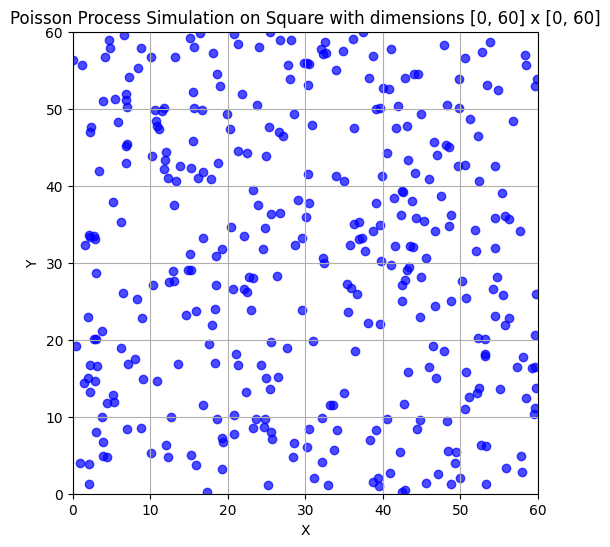

'COORDINATES OF THE POINTS: [[2.13527774e+01 5.83835907e+01]\n [6.90604477e+00 5.18669565e+01]\n [3.21073717e+01 9.86150461e+00]\n [3.01804086e+01 6.09522010e+00]\n [3.50414972e+01 1.31165608e+01]\n [4.22028906e+01 5.46436261e+00]\n [3.95851455e+01 5.01497972e+01]\n [3.21778328e+01 4.05683207e+00]\n [4.56242964e+01 1.35108978e+00]\n [4.24672861e+01 1.60600515e-01]\n [1.07527326e+01 4.84107600e+01]\n [4.38596940e+01 3.20438143e+01]\n [3.08623783e+01 4.78898281e+01]\n [8.77671274e+00 8.57179421e+00]\n [6.91283897e+00 4.29757698e+01]\n [3.26709818e+01 5.71775881e+01]\n [3.25274764e+01 5.86189768e+01]\n [1.51108089e+01 5.91324420e+01]\n [2.55931535e+01 8.01907386e+00]\n [4.67854405e+01 2.44055221e+01]\n [4.49414078e+01 4.93713809e+01]\n [4.48559128e+01 9.58585245e+00]\n [6.82363921e+00 5.10726025e+01]\n [3.31221968e+01 1.14809695e+01]\n [3.53384067e+01 2.72807701e+01]\n [2.10358769e+01 1.81744284e+01]\n [5.86599362e+00 4.83158217e+01]\n [2.06872074e+01 2.66364671e+01]\n [2.90503281e+01 3.8

In [15]:
T = 60 # dimension of the square domain
lam = 0.1  #density (lambda) of the poisson process

# Simulate Poisson process
simulate_and_plot_poisson_process_on_plane(T, lam)


Now we produce the code for the **probability mass function** of a Poisson process on a plane: probability of having k points in a domain D of size T X T, given a Poisson Process on a Plane of density $\lambda$:

$$
  P(X(D) = k) = \frac{e^{-\lambda |D|} (\lambda |D|)^k}{k!}
  $$

In [22]:
def poisson_process_on_a_plane_probability_mass_function(lam, k, D_area): #inputs: density of the poisson process lambda, k points, domain area

    # Calculate e^(-lambda * domain area)
    exp_term = np.exp(-lam * D_area)

    # Calculate e^(-lambda * domain area) * (lambda * area)^k 
    numerator = exp_term * (lam * D_area)**k 

    # Calculate the PMF value
    pmf_value = numerator / math.factorial(k)

    return f"The probability of having {k} points in a plane of area {D_area} given a Poissson process on a plane with density lambda equal to {lam} is: {pmf_value}"



Example probability mass function of a Poisson Process on a Plane:

In [20]:
lambda_val = 0.1 # Lambda parameter
k_val = 2        # Number of points/events
area_val = 100   # Area of the domain

poisson_process_on_a_plane_probability_mass_function(lambda_val, k_val, area_val)

'The probability of having 2 points in a plane of area 100 given a Poissson process on a plane with density lambda equal to 0.1 is: 0.0022699964881242427'

Create a function for the **expectation** of a Poisson Process on a Plane 

$E[X(D)] = \lambda|D|$

In [23]:
def poisson_process_on_a_plane_expectation(lam, D_area):  #inputs: density of the poisson process lambda, domain area
  return f'The expected number of points for a poisson process on a plane of Area {D_area} is: {lam* D_area}'



Example expectation of a Poisson Process on a Plane:

In [26]:
lambda_val = 0.3 # Lambda parameter
area_val = 200   # Area of the domain

poisson_process_on_a_plane_expectation(lambda_val, area_val)

'The expected number of points for a poisson process on a plane of Area 200 is: 60.0'

CHAPTER 2. BOOLEAN RANDOM NETWORK

In [10]:
def simulate_poisson_process_on_plane(T, lam):
        # Step 1: Generate number of points N ~ Poi(lam * T^2)
        N = np.random.poisson(lam * T**2)

        # Step 2: Generate uniform random points in (0, T)x(0, T)
        if N == 0:
            return np.array([])  # No points in Λ
        else:
            points = np.random.rand(N, 2) * T  # Generate N random points with 2 coordinates each
            return points

def find_clusters(points, r):
    """
    Find clusters in a Boolean random network based on Euclidean distance.

    Parameters:
    points : numpy.ndarray
        Array of shape (N, 2) containing N points where each point is (x, y) coordinates.
    r : float
        Radius for connecting points.

    Returns:
    num_clusters : int
        Number of clusters found.
    """
    def bfs(node, visited):
        queue = deque([node])
        cluster = []
        while queue:
            v = queue.popleft()
            if tuple(v) not in visited:
                visited.add(tuple(v))
                cluster.append(v)
                neighbors = [w for w in points if np.linalg.norm(v - w) <= 2 * r and tuple(w) not in visited]
                queue.extend(neighbors)
        return cluster

    visited = set()
    num_clusters = 0

    for point in points:
        if tuple(point) not in visited:
            cluster = bfs(point, visited)
            num_clusters += 1

    return num_clusters

def simulate_boolean_network_avg_number_of_clusters(T, lam, M):
    """
    Simulate Boolean random network multiple times and compute the average number of clusters.

    Parameters:
    T : float
        Size of the square domain.
    lam : float
        Density parameter of the Poisson process.
    M : int
        Number of simulations to perform.

    Returns:
    avg_num_clusters : float
        Average number of clusters found in the simulations.
    """
    r = 1
    num_clusters_list = []

    for _ in range(M):
        # Simulate Poisson process
        points = simulate_poisson_process_on_plane(T, lam)

        # Find clusters
        num_clusters = find_clusters(points, r)
        num_clusters_list.append(num_clusters)

    # Compute average number of clusters
    avg_num_clusters = np.mean(num_clusters_list)

    return avg_num_clusters




In [11]:
# Parameters
T = 100  # Size of the square domain
lam = 0.1  # Density parameter for Poisson process
M = 50  # Number of simulations

# Perform simulation
avg_num_clusters = simulate_boolean_network_avg_number_of_clusters(T, lam, M)

print(f"Average number of clusters: {avg_num_clusters}")

Average number of clusters: 511.82


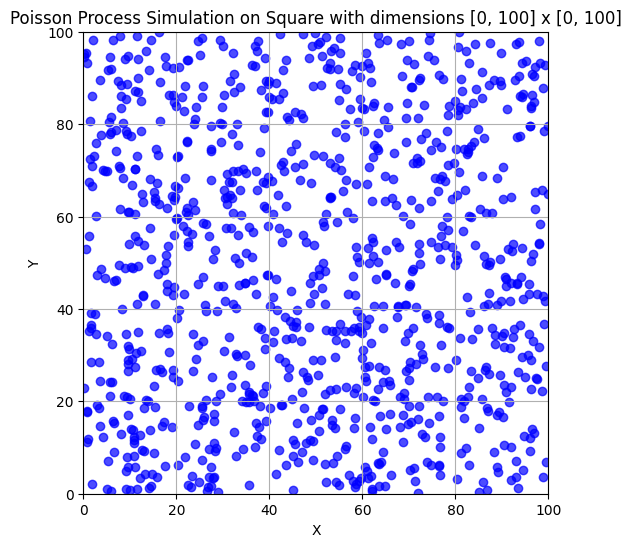

'COORDINATES OF THE POINTS: [[37.03406922 69.84778385]\n [56.31494767 35.2064331 ]\n [17.8451119  49.98196732]\n ...\n [16.91792253 26.41694872]\n [30.11130001 45.02893011]\n [ 8.37866228 40.08259825]]'

In [12]:
#graphical representation:

simulate_and_plot_poisson_process_on_plane(100, 0.1)
                                          

Running simulation to discover how the size of the largest cluster depends on lambda:

* set T -size of the square domain- 100
* set M -number of simulations- 100
* let lambda varying


In [13]:
def find_clusters(points, r):
    """
    Find clusters in a Boolean random network based on Euclidean distance.

    Parameters:
    points : numpy.ndarray
        Array of shape (N, 2) containing N points where each point is (x, y) coordinates.
    r : float
        Radius for connecting points.

    Returns:
    clusters : list
        List of clusters, where each cluster is a list of points.
    """
    def bfs(node, visited):
        queue = deque([node])
        cluster = []
        while queue:
            v = queue.popleft()
            if tuple(v) not in visited:
                visited.add(tuple(v))
                cluster.append(v)
                neighbors = [w for w in points if np.linalg.norm(v - w) <= 2 * r and tuple(w) not in visited]
                queue.extend(neighbors)
        return cluster

    visited = set()
    clusters = []

    for point in points:
        if tuple(point) not in visited:
            cluster = bfs(point, visited)
            clusters.append(cluster)

    return clusters

def largest_cluster_size(clusters):
    """
    Find the size of the largest cluster.

    Parameters:
    clusters : list
        List of clusters, where each cluster is a list of points.

    Returns:
    largest_size : int
        Size of the largest cluster.
    """
    if not clusters:
        return 0
    largest_size = max(len(cluster) for cluster in clusters)
    return largest_size

def simulate_boolean_network(T, lam, M):
    """
    Simulate Boolean random network multiple times and compute the average size of the largest cluster
    and the average number of points.

    Parameters:
    T : float
        Size of the square domain.
    lam : float
        Density parameter of the Poisson process.
    M : int
        Number of simulations to perform.

    Returns:
    avg_largest_cluster_size : float
        Average size of the largest cluster found in the simulations.
    avg_num_points : float
        Average number of points generated in the simulations.
    """
    r = 1
    largest_cluster_sizes = []
    total_num_points = []

    for _ in range(M):
        # Simulate Poisson process
        points = simulate_poisson_process_on_plane(T, lam)

        # Record number of points
        total_num_points.append(len(points))

        # Find clusters
        clusters = find_clusters(points, r)
        size_of_largest_cluster = largest_cluster_size(clusters)
        largest_cluster_sizes.append(size_of_largest_cluster)

    # Compute average size of the largest cluster and average number of points
    avg_largest_cluster_size = np.mean(largest_cluster_sizes)
    avg_num_points = np.mean(total_num_points)

    return avg_largest_cluster_size, avg_num_points



In [14]:
# Parameters

T = 100  # Size of the square domain
lam = 0.12  # Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: {(avg_largest_cluster_size/avg_num_points)*100} %")

The average number of points is: 1200.775
Average size of the largest cluster: 17.65
PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: 1.4698840332285397 %


In [15]:
#THRESHOLD SIMULATION

# Parameters
T = 100  # Size of the square domain
lam = (4.513/(4*math.pi)) # THRESHOLD VALUE Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: {(avg_largest_cluster_size/avg_num_points)*100} %")


The average number of points is: 3603.0
Average size of the largest cluster: 2068.9
PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: 57.42159311684707 %


In [16]:
#crea una tabella che registra su asse X il valore di lambda e su Y la percentale di punti appartenenti al largest cluster

T = 100  # Size of the square domain
lambda_values = np.arange(0.1, 0.42, 0.02)  # Density parameter for Poisson process
M = 20  # Number of simulations

# Perform simulations
results = []

for lam in lambda_values:
    avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)
    if avg_num_points > 0:
        percentage_in_largest_cluster = (avg_largest_cluster_size / avg_num_points) * 100
    else:
        percentage_in_largest_cluster = 0
    results.append(percentage_in_largest_cluster)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, results, marker='o', linestyle='-', color='b')
plt.title('Percentage of Points in the Largest Cluster vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Percentage of Points in the Largest Cluster')
plt.grid(True)
plt.show()

